In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings ; warnings.filterwarnings('ignore')

파일 다운로드 링크
https://www.kaggle.com/c/bike-sharing-demand/data

In [3]:
train = pd.read_csv("/Users/user/Downloads/시각화 알아보기/train.csv")

In [4]:
train # use a group of data(A) to predict a group of data(B)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
train.info() # check basic info of train set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<AxesSubplot:>

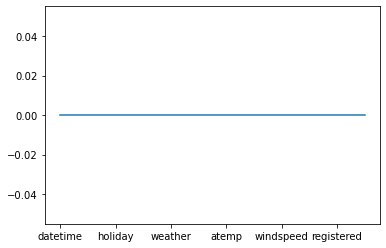

In [9]:
train.isnull().sum().plot() # check null data and visualize

## Datetime yy-mm-dd-hh-mm-ss-ww

In [13]:
# keep the original data intact as best as possible 
# exception : info such as datetime, not affecting data manipulation later time
train['datetime'] = pd.to_datetime(train['datetime']) 

In [14]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [19]:
# Remind the one-hot encoding
train['datetime_year'] = train['datetime'].dt.year
print(train['datetime_year'].unique())
print(len(train['datetime_year']))
train['datetime_year']

[2011 2012]
10886


0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime_year, Length: 10886, dtype: int64

In [22]:
train['datetime_month'] = train['datetime'].dt.month
print(train['datetime_month'].unique())
train['datetime_month']

[ 1  2  3  4  5  6  7  8  9 10 11 12]


0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime_month, Length: 10886, dtype: int64

In [25]:
# train data -> apply machine learning, test data -> predict data with the machine learning
train['datetime_day'] = train['datetime'].dt.day 
print(train['datetime_day'].unique())
train['datetime_day']

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime_day, Length: 10886, dtype: int64

In [26]:
train[['datetime_year', 'datetime_month', 'datetime_day']]

,datetime_year,datetime_month,datetime_day
0,2011,1,1
1,2011,1,1
2,2011,1,1
3,2011,1,1
4,2011,1,1
...,...,...,...
10881,2012,12,19
10882,2012,12,19
10883,2012,12,19
10884,2012,12,19


In [27]:
train['datetime_hour'] = train['datetime'].dt.hour
print(train['datetime_hour'].unique())
train['datetime_hour']

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime_hour, Length: 10886, dtype: int64

In [32]:
train['datetime_minute'] = train['datetime'].dt.minute
print(len(train['datetime_minute'].unique()))
train['datetime_minute']

1


0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime_minute, Length: 10886, dtype: int64

In [35]:
train['datetime_second'] = train['datetime'].dt.second
print(train['datetime_second'].unique())
train['datetime_second']

[0]


0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime_second, Length: 10886, dtype: int64

In [47]:
train['datetime_weekday'] = train['datetime'].dt.day_name() # method 1
print(train['datetime_weekday'].unique())
train['datetime_weekday']

['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime_weekday, Length: 10886, dtype: object

In [48]:
train['weekday'] = train['datetime'].dt.weekday + 1 # Add 1 to make it start at one. 
print(train['weekday'].unique())
train['weekday']


[6 7 1 2 3 4 5]


0        6
1        6
2        6
3        6
4        6
        ..
10881    3
10882    3
10883    3
10884    3
10885    3
Name: weekday, Length: 10886, dtype: int64

In [58]:
# datetime datatype
train['datetime'] = pd.to_datetime(train['datetime']) 
train['datetime_year'] = train['datetime'].dt.year
train['datetime_month'] = train['datetime'].dt.month
train['datetime_day'] = train['datetime'].dt.day 
train['datetime_hour'] = train['datetime'].dt.hour
train['datetime_minute'] = train['datetime'].dt.minute
train['datetime_second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.weekday + 1

train[['datetime','datetime_year', 'datetime_month', 'datetime_day',
      'datetime_hour', 'datetime_minute', 'datetime_second','weekday']]

,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,weekday
0,2011-01-01 00:00:00,2011,1,1,0,0,0,6
1,2011-01-01 01:00:00,2011,1,1,1,0,0,6
2,2011-01-01 02:00:00,2011,1,1,2,0,0,6
3,2011-01-01 03:00:00,2011,1,1,3,0,0,6
4,2011-01-01 04:00:00,2011,1,1,4,0,0,6
...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19,0,0,3
10882,2012-12-19 20:00:00,2012,12,19,20,0,0,3
10883,2012-12-19 21:00:00,2012,12,19,21,0,0,3
10884,2012-12-19 22:00:00,2012,12,19,22,0,0,3


## Countplot

<AxesSubplot:xlabel='weather', ylabel='count'>

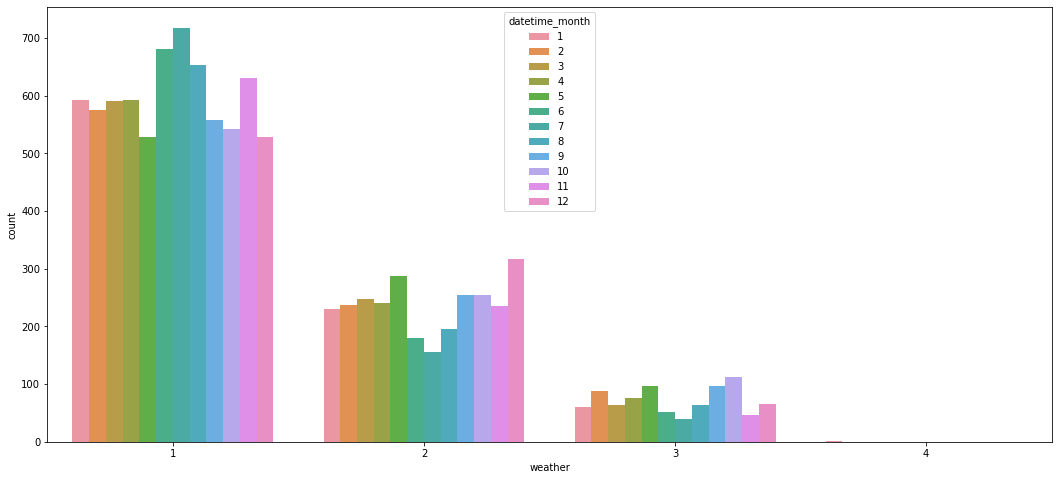

In [80]:
import seaborn as sns # sns is short for seaborn
plt.figure(figsize=(18,8))

# discrete datatype is suitable for Countplot. Continuous one is not
sns.countplot(data=train, x = 'weather', hue = 'datetime_month') 

## Bar plot

<AxesSubplot:xlabel='datetime_year', ylabel='count'>

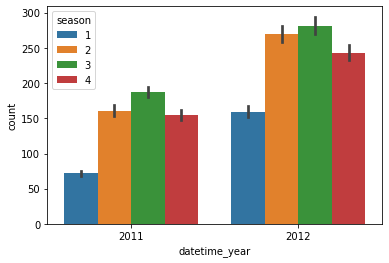

In [92]:

sns.barplot(data = train, x = 'datetime_year', y = 'count', hue = 'season')

<AxesSubplot:xlabel='datetime_month', ylabel='count'>

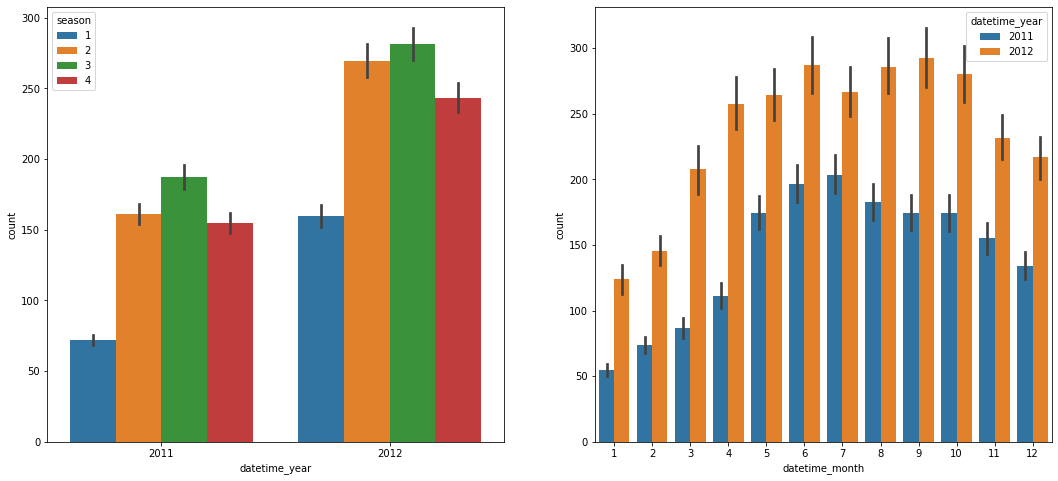

In [99]:
figure,(ax1, ax2) =plt.subplots(nrows=1, ncols=2) # figure is similar to dataframe
figure.set_size_inches(18,8)

sns.barplot(data=train, x = 'datetime_year', y = 'count', hue = 'season', ax=ax1)
sns.barplot(data=train, x = 'datetime_month', y = 'count', hue = 'datetime_year', ax=ax2)

<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

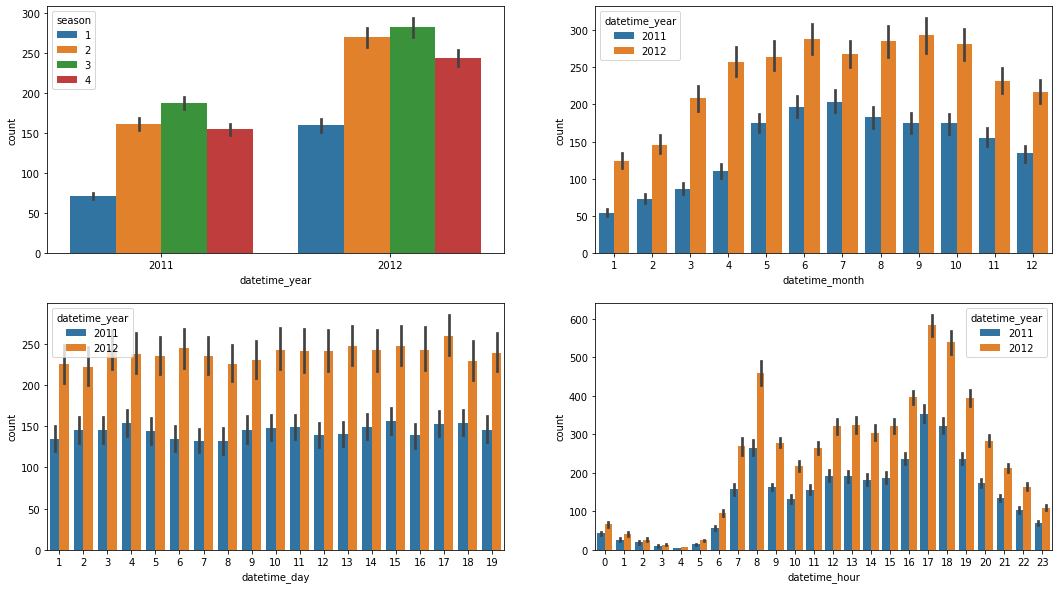

In [110]:
# Focus on data tendency to catch its meaning
figure,((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(18,10)
sns.barplot(data = train, x = 'datetime_year', y = 'count', hue = 'season', ax = ax1)
sns.barplot(data = train, x = 'datetime_month', y = 'count', hue = 'datetime_year', ax = ax2)
sns.barplot(data = train, x = 'datetime_day', y = 'count', hue = 'datetime_year', ax = ax3)
sns.barplot(data = train, x = 'datetime_hour', y = 'count', hue = 'datetime_year', ax = ax4)

## Point plot

In [111]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
       'datetime_minute', 'datetime_second', 'datetime_weekday', 'weekday'],
      dtype='object')

<AxesSubplot:xlabel='windspeed', ylabel='count'>

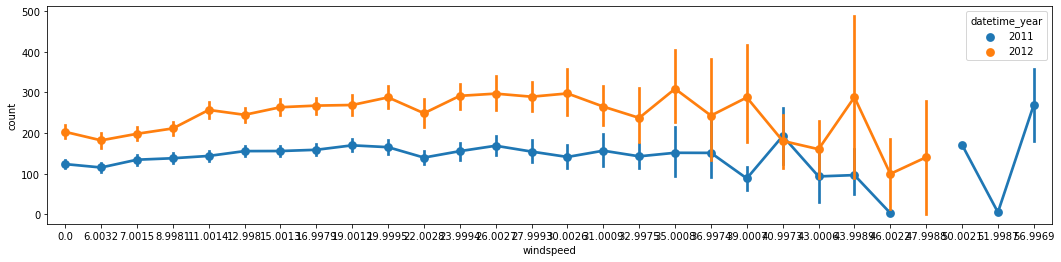

In [113]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x='windspeed', y ='count', hue = 'datetime_year')


<AxesSubplot:xlabel='windspeed_int', ylabel='count'>

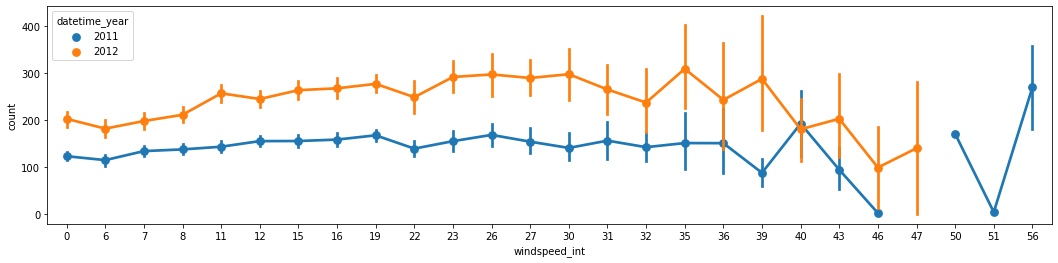

In [114]:
train['windspeed_int'] = train['windspeed'].astype(int)
plt.figure(figsize=(18,4))

sns.pointplot(data=train, x='windspeed_int', y ='count', hue = 'datetime_year')

<AxesSubplot:xlabel='windspeed_int', ylabel='count'>

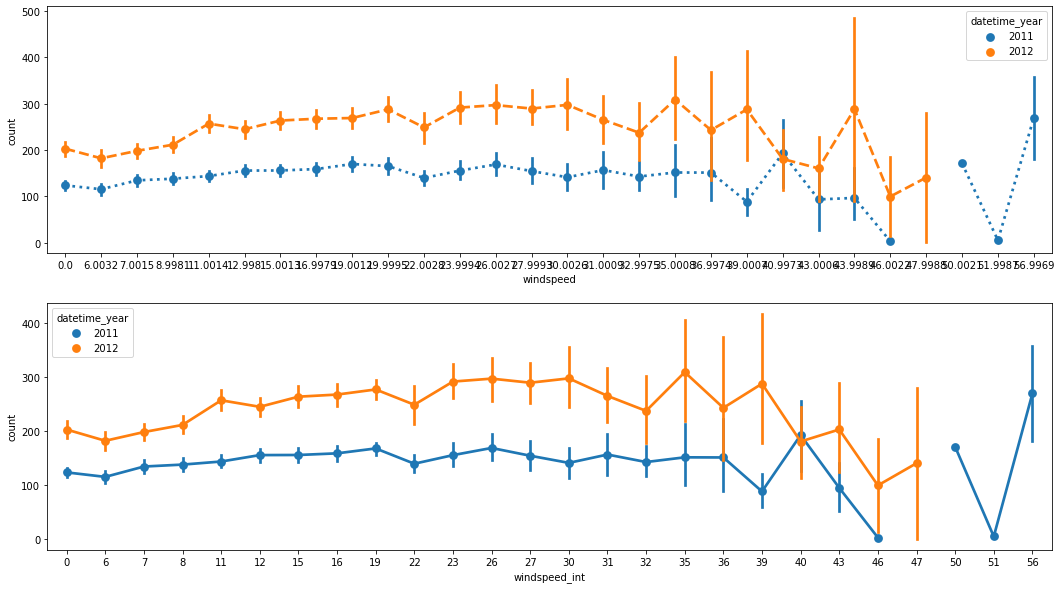

In [135]:
figure,((ax1,ax2)) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(18,10)
sns.pointplot(data = train, x = 'windspeed', y = 'count', hue = 'datetime_year', ax = ax1, linestyles=[":", "--"])
sns.pointplot(data = train, x = 'windspeed_int', y = 'count', hue = 'datetime_year', ax = ax2)

In [127]:
print(train[(train['windspeed_int']>=0) & (train['windspeed_int']<=10)].shape)
print(train[(train['windspeed_int']>10) & (train['windspeed_int']<=20)].shape)
print(train[(train['windspeed_int']>20) & (train['windspeed_int']<=30)].shape)
print(train[(train['windspeed_int']>30) & (train['windspeed_int']<=40)].shape)
print(train[(train['windspeed_int']>40)].shape)

(4339, 21)
(5052, 21)
(1179, 21)
(287, 21)
(29, 21)


<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

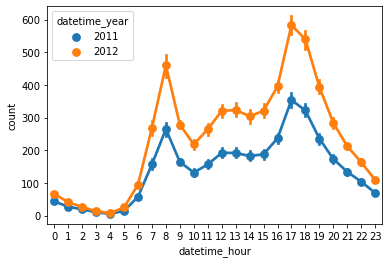

In [136]:
sns.pointplot(data=train, x = 'datetime_hour', y='count', hue = 'datetime_year')

## Distplot

<AxesSubplot:xlabel='atemp', ylabel='Density'>

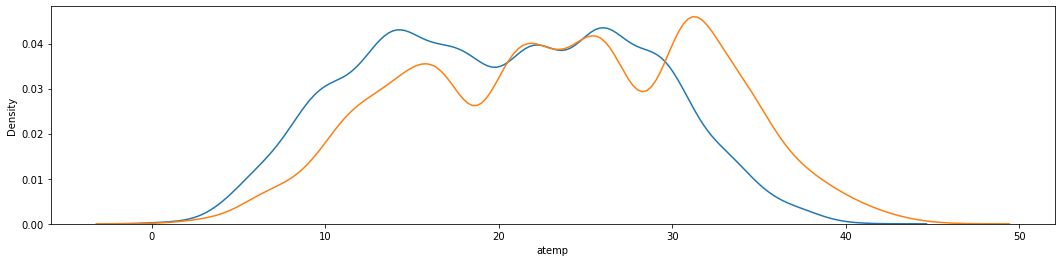

In [144]:
plt.figure(figsize=(18,4))
sns.distplot(train['temp'], hist=False, kde=True, bins=None)
sns.distplot(train['atemp'], hist=False, kde=True, bins=None)

### 불쾌지수 = 1.8*기온-0.55*(1-습도)*(1.8*기온-26)+32
'매우높음'은 80이상
'높음'은 75~80사이
'보통'은 68~75사이
'낮음'은 68이하

In [148]:
train['THI'] = 1.8*train['temp'] - 0.55*(1-0.01*train['humidity'])*(1.8*train['temp']-26)+32
train[['temp', 'humidity', 'THI']].head()

,temp,humidity,THI
0,9.84,81,50.578096
1,9.02,80,49.310040
2,9.02,80,49.310040
3,9.84,75,50.851600
4,9.84,75,50.851600


In [158]:
# one-hot encoding easier way than using loc method 
train['THI_1'] = (train['THI']<68).astype(int)
train['THI_2'] =((train['THI']>=68) & (train['THI']<75)).astype(int)
train['THI_3'] =((train['THI']>=75) & (train['THI']<80)).astype(int)
train['THI_4'] =(train['THI']>=80).astype(int)

train[(train['THI']>=68) & (train['THI']<75)][['THI', 'THI_1', 'THI_2', 'THI_3', 'THI_4']]

,THI,THI_1,THI_2,THI_3,THI_4
819,69.342740,0,1,0,0
820,69.041120,0,1,0,0
822,68.519304,0,1,0,0
842,70.549220,0,1,0,0
843,72.714784,0,1,0,0
...,...,...,...,...,...
10518,70.090478,0,1,0,0
10660,68.540300,0,1,0,0
10661,68.120650,0,1,0,0
10662,68.180600,0,1,0,0


<AxesSubplot:xlabel='temp', ylabel='Density'>

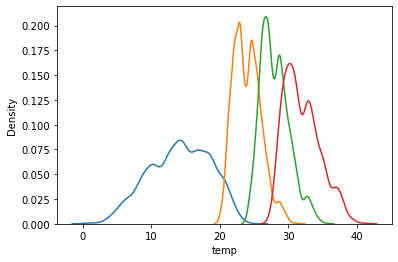

In [162]:
THI_1 = train[train['THI_1']==1]
THI_2 = train[train['THI_2']==1]
THI_3 = train[train['THI_3']==1]
THI_4 = train[train['THI_4']==1]
sns.distplot(THI_1['temp'], hist=False)
sns.distplot(THI_2['temp'], hist=False)
sns.distplot(THI_3['temp'], hist=False)
sns.distplot(THI_4['temp'], hist=False)

In [163]:
train.loc[train['THI']<68, 'THI_type'] = 1
train.loc[(train['THI']>=68) & (train['THI']<75), 'THI_type'] = 2
train.loc[(train['THI']>=75) & (train['THI']<80), 'THI_type'] = 3
train.loc[train['THI']>=80, 'THI_type'] = 4

train[(train['THI']>=68) & (train['THI']<75)][['THI', 'THI_1', 'THI_2', 'THI_3', 'THI_4']]

,THI,THI_1,THI_2,THI_3,THI_4
819,69.342740,0,1,0,0
820,69.041120,0,1,0,0
822,68.519304,0,1,0,0
842,70.549220,0,1,0,0
843,72.714784,0,1,0,0
...,...,...,...,...,...
10518,70.090478,0,1,0,0
10660,68.540300,0,1,0,0
10661,68.120650,0,1,0,0
10662,68.180600,0,1,0,0


## Scatter plot

In [164]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime_second,datetime_weekday,weekday,windspeed_int,THI,THI_1,THI_2,THI_3,THI_4,THI_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,Saturday,6,0,50.578096,1,0,0,0,1.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,Saturday,6,0,49.310040,1,0,0,0,1.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,Saturday,6,0,49.310040,1,0,0,0,1.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,Saturday,6,0,50.851600,1,0,0,0,1.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,Saturday,6,0,50.851600,1,0,0,0,1.0


<AxesSubplot:xlabel='THI', ylabel='temp'>

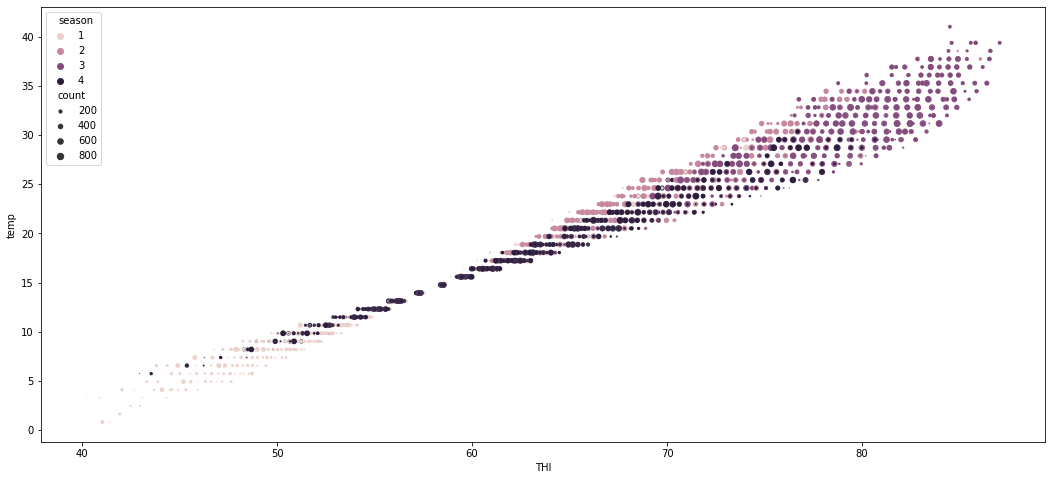

In [168]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=train, x='THI', y='temp', hue = 'season', size='count', sizes=(0,50))

## Lmplot

<Figure size 1296x576 with 0 Axes>

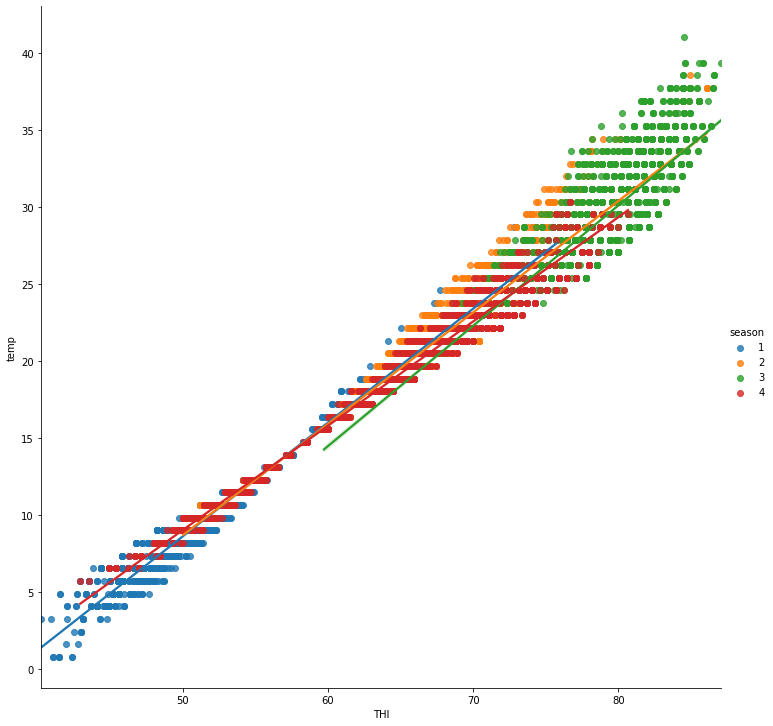

In [169]:
plt.figure(figsize=(18,8))
sns.lmplot(data=train, x='THI', y='temp', hue='season', size=10, fit_reg=True)

<Figure size 1296x576 with 0 Axes>

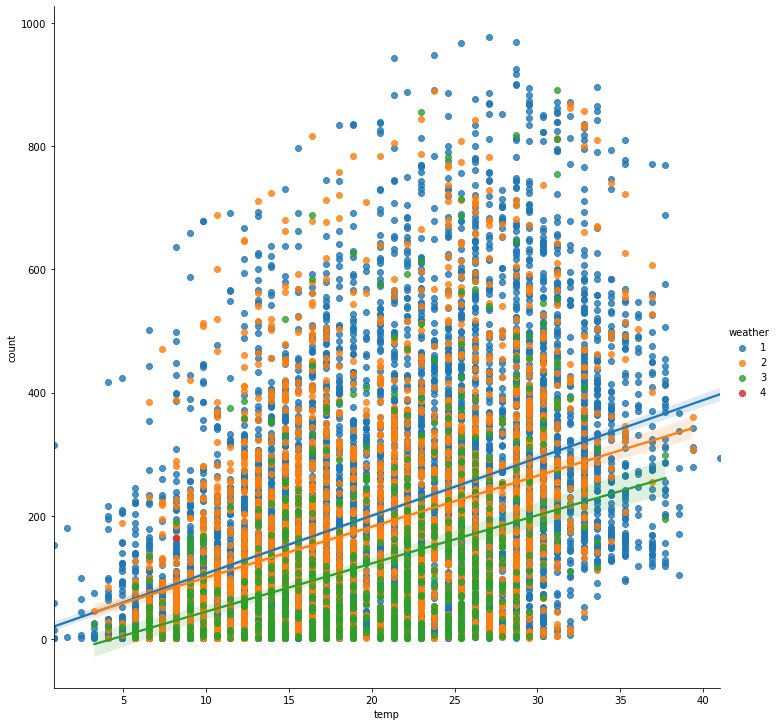

In [172]:
plt.figure(figsize=(18,8))
sns.lmplot(data=train, x='temp', y='count', hue='weather', size=10, fit_reg=True)

## Heatmap

In [173]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
       'datetime_minute', 'datetime_second', 'datetime_weekday', 'weekday',
       'windspeed_int', 'THI', 'THI_1', 'THI_2', 'THI_3', 'THI_4', 'THI_type'],
      dtype='object')

In [176]:
column = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'datetime_year', 'datetime_month', 
       'datetime_day', 'datetime_hour', 
       'weekday', 'windspeed_int', 'THI', 'THI_type', 'casual', 'registered', 'count']

train_simple = train[column]
train_simple

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,datetime_year,datetime_month,datetime_day,datetime_hour,weekday,windspeed_int,THI,THI_type,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,2011,1,1,0,6,0,50.578096,1.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,2011,1,1,1,6,0,49.310040,1.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,2011,1,1,2,6,0,49.310040,1.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,2011,1,1,3,6,0,50.851600,1.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,2011,1,1,4,6,0,50.851600,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,2012,12,19,19,3,26,59.481900,1.0,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,2012,12,19,20,3,15,58.433668,1.0,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,2012,12,19,21,3,15,57.286766,1.0,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,2012,12,19,22,3,6,57.286766,1.0,12,117,129


In [177]:
train_simple.corr() # create a table showing correlation 

,season,holiday,workingday,weather,temp,atemp,humidity,datetime_year,datetime_month,datetime_day,datetime_hour,weekday,windspeed_int,THI,THI_type,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.004797,0.971524,0.001729,-0.006546,-0.010553,-0.146594,0.272562,0.186884,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.012021,0.001731,-0.015877,-0.000354,-0.191832,0.008952,0.006491,0.027590,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,-0.002482,-0.003394,0.009829,0.002780,-0.704267,0.013517,0.029932,0.018701,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,-0.012548,0.012144,-0.007890,-0.022740,-0.047692,0.006684,-0.019032,-0.035444,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,0.061226,0.257589,0.015551,0.145430,-0.038466,-0.019852,0.986839,0.868705,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,0.058540,0.264173,0.011866,0.140343,-0.040235,-0.059384,0.973671,0.840221,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.078606,0.204537,-0.011335,-0.278011,-0.026507,-0.318133,0.034579,0.024507,-0.348187,-0.265458,-0.317371
datetime_year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,1.000000,-0.004932,0.001800,-0.004234,-0.003785,-0.015916,0.053065,0.021364,0.145241,0.264265,0.260403
datetime_month,0.971524,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.004932,1.000000,0.001974,-0.006818,-0.002266,-0.149529,0.273621,0.181704,0.092722,0.169451,0.166862
datetime_day,0.001729,-0.015877,0.009829,-0.007890,0.015551,0.011866,-0.011335,0.001800,0.001974,1.000000,0.001132,-0.011070,0.036094,0.019782,-0.031735,0.014109,0.019111,0.019826


In [182]:
train_simple.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'datetime_year', 'datetime_month', 'datetime_day',
       'datetime_hour', 'weekday', 'windspeed_int', 'THI', 'THI_type',
       'casual', 'registered', 'count'],
      dtype='object')

<AxesSubplot:>

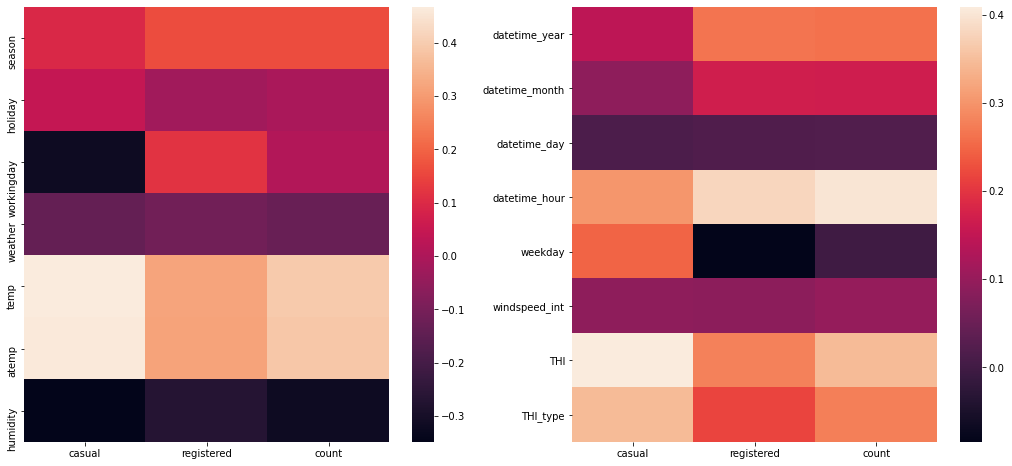

In [185]:

figure,(ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)
sns.heatmap(train_simple.corr().loc['season':'humidity', 'casual':'count'], ax=ax1) # heatmap's more often used
sns.heatmap(train_simple.corr().loc['datetime_year':'THI_type', 'casual':'count'], ax=ax2)

## Box plot

<AxesSubplot:xlabel='THI_type', ylabel='count'>

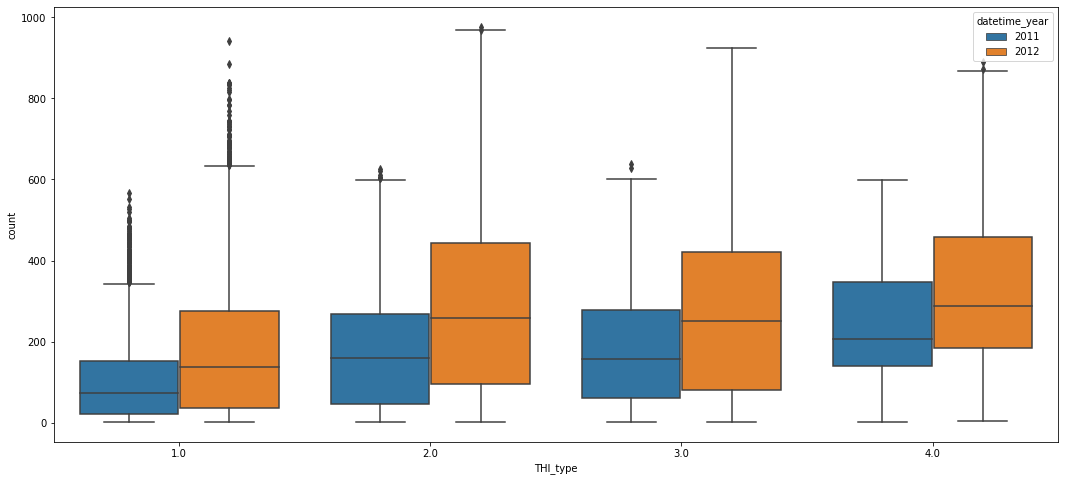

In [187]:
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='THI_type', y='count', hue='datetime_year')

## Violinplot

<AxesSubplot:xlabel='THI_type', ylabel='count'>

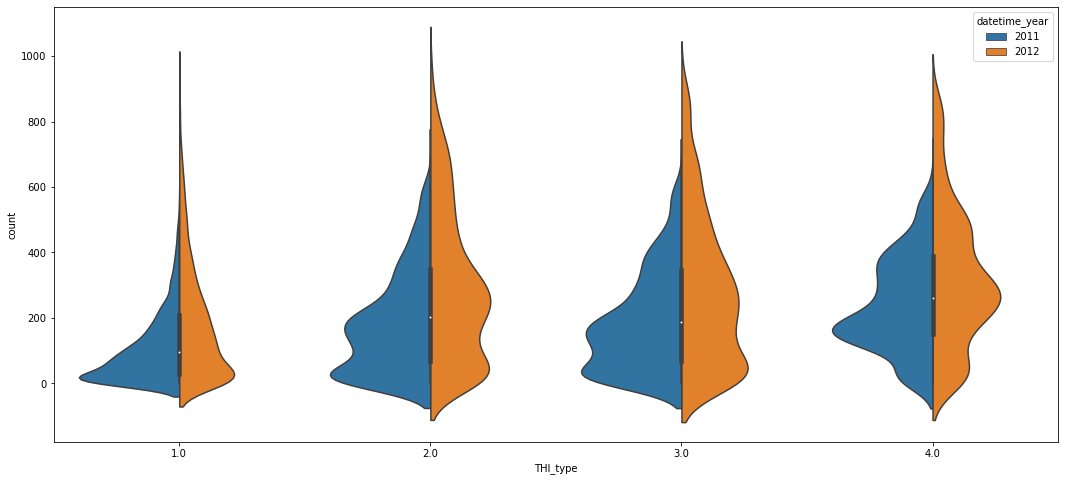

In [189]:
plt.figure(figsize=(18,8))
sns.violinplot(data=train, x='THI_type', y='count', hue='datetime_year', split=True)

## 문제 풀이

1. test.csv 파일을 아래와 같이 불러오세요.
![문제1](문제1.jpg)

In [192]:
# code를 적으세요.
myTest = pd.read_csv("/Users/user/Downloads/시각화 알아보기/test.csv")
myTest

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


2. test.csv 파일을 활용하여 아래와 같이 도출해보세요.
![문제2](문제2.jpg)

In [193]:
# code를 적으세요.
myTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


3. test.csv 파일을 활용하여 datetime 컬럼을 추가해보세요.
![문제3](문제3.jpg)

In [217]:
# code를 적으세요.
myTest['datetime'] = pd.to_datetime(myTest['datetime']) 

myTest['datetime_year'] = myTest['datetime'].dt.year
myTest['datetime_month'] = myTest['datetime'].dt.month
myTest['datetime_day'] = myTest['datetime'].dt.day
myTest['datetime_hour'] = myTest['datetime'].dt.hour
myTest['datetime_minute'] = myTest['datetime'].dt.minute
myTest['datetime_second'] = myTest['datetime'].dt.second
myTest['datetime_weekday'] = myTest['datetime'].dt.day_name()
myTest['weekday'] = myTest['datetime'].dt.weekday+1


In [218]:
myTest.shape

(6493, 17)

In [219]:
myTest[['datetime','datetime_year','datetime_month', 'datetime_day',
        'datetime_hour', 'datetime_minute','datetime_second', 'datetime_weekday','weekday']]

,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_weekday,weekday
0,2011-01-20 00:00:00,2011,1,20,0,0,0,Thursday,4
1,2011-01-20 01:00:00,2011,1,20,1,0,0,Thursday,4
2,2011-01-20 02:00:00,2011,1,20,2,0,0,Thursday,4
3,2011-01-20 03:00:00,2011,1,20,3,0,0,Thursday,4
4,2011-01-20 04:00:00,2011,1,20,4,0,0,Thursday,4
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,2012,12,31,19,0,0,Monday,1
6489,2012-12-31 20:00:00,2012,12,31,20,0,0,Monday,1
6490,2012-12-31 21:00:00,2012,12,31,21,0,0,Monday,1
6491,2012-12-31 22:00:00,2012,12,31,22,0,0,Monday,1


4-1. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4](문제4.jpg)

<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

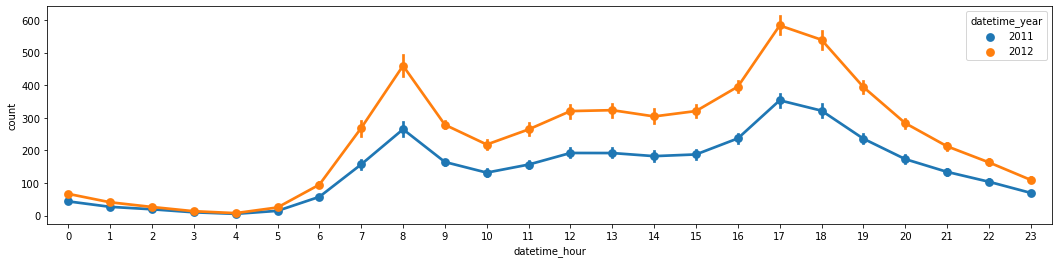

In [220]:
# code를 적으세요.
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='datetime_hour', y ='count', hue = 'datetime_year')

4-2. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4-2](문제4-2.jpg)

<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

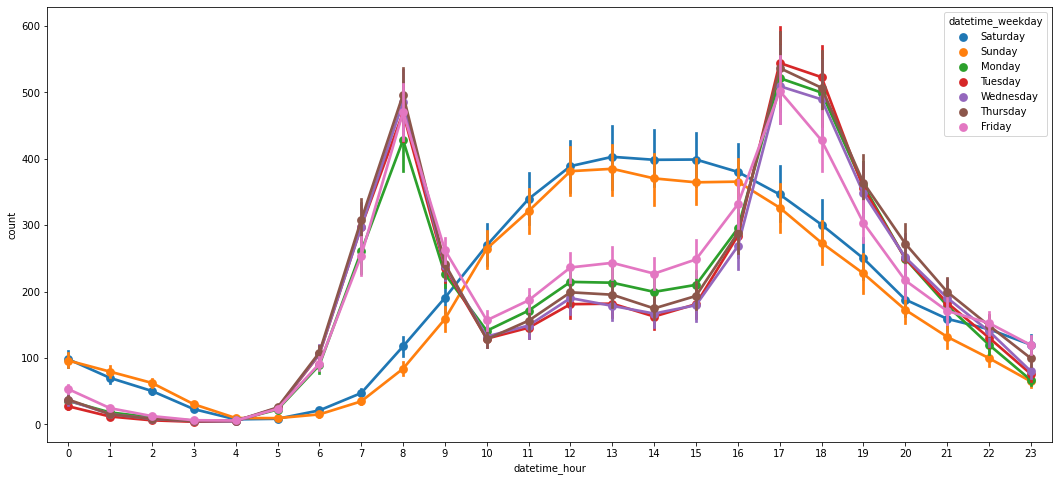

In [224]:
# code를 적으세요.
plt.figure(figsize=(18,8))
sns.pointplot(data=train, x='datetime_hour', y ='count', hue = 'datetime_weekday')


4-3. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4-3](문제4-3.jpg)

<AxesSubplot:xlabel='datetime_hour', ylabel='casual'>

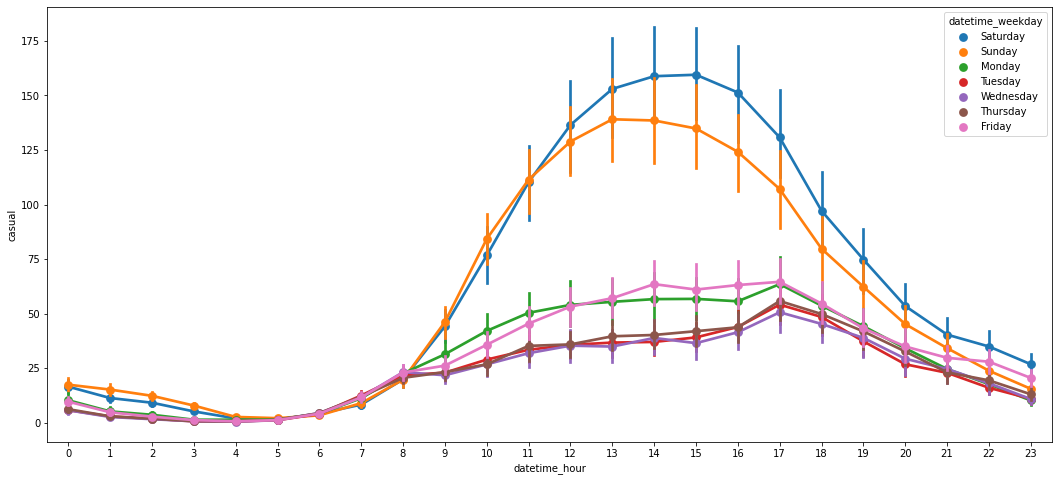

In [225]:
# code를 적으세요.
plt.figure(figsize=(18,8))
sns.pointplot(data=train, x='datetime_hour', y='casual', hue='datetime_weekday')

4-4. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4-4](문제4-4.jpg)

<AxesSubplot:xlabel='datetime_hour', ylabel='registered'>

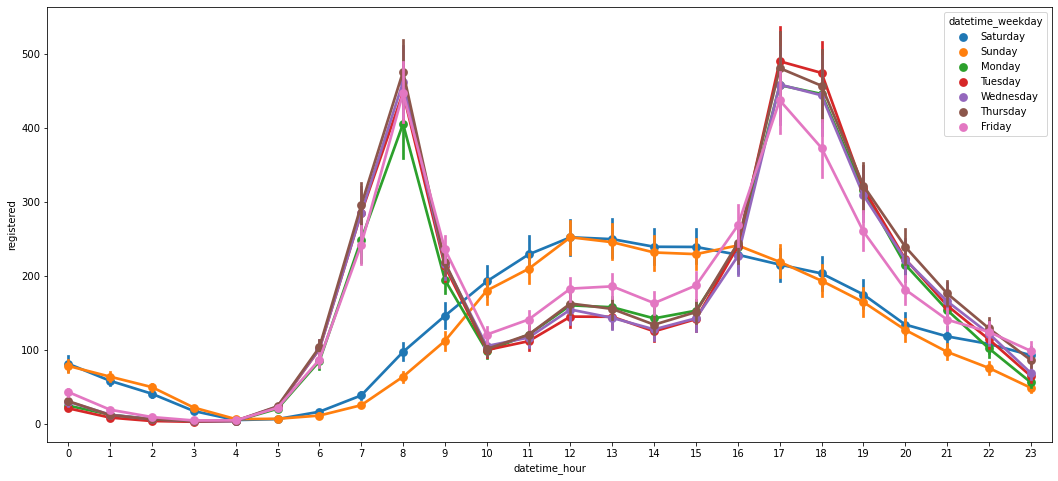

In [226]:
# code를 적으세요.
plt.figure(figsize=(18,8))
sns.pointplot(data=train, x='datetime_hour', y='registered', hue='datetime_weekday')

5. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제5](문제5.jpg)

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

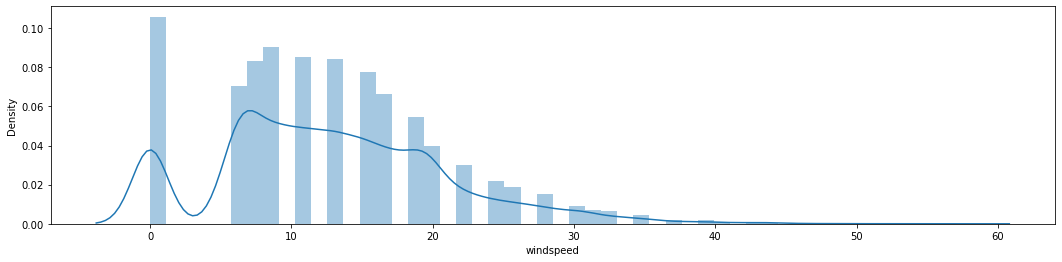

In [232]:
# code를 적으세요.

plt.figure(figsize=(18,4))
sns.distplot(train['windspeed'], hist=True, kde=True, bins=None)

# plt.figure(figsize=(18,4))
# sns.distplot(train['temp'], hist=False, kde=True, bins=None)
# sns.distplot(train['atemp'], hist=False, kde=True, bins=None)

6-1. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제6](문제6.jpg)

<AxesSubplot:xlabel='temp', ylabel='atemp'>

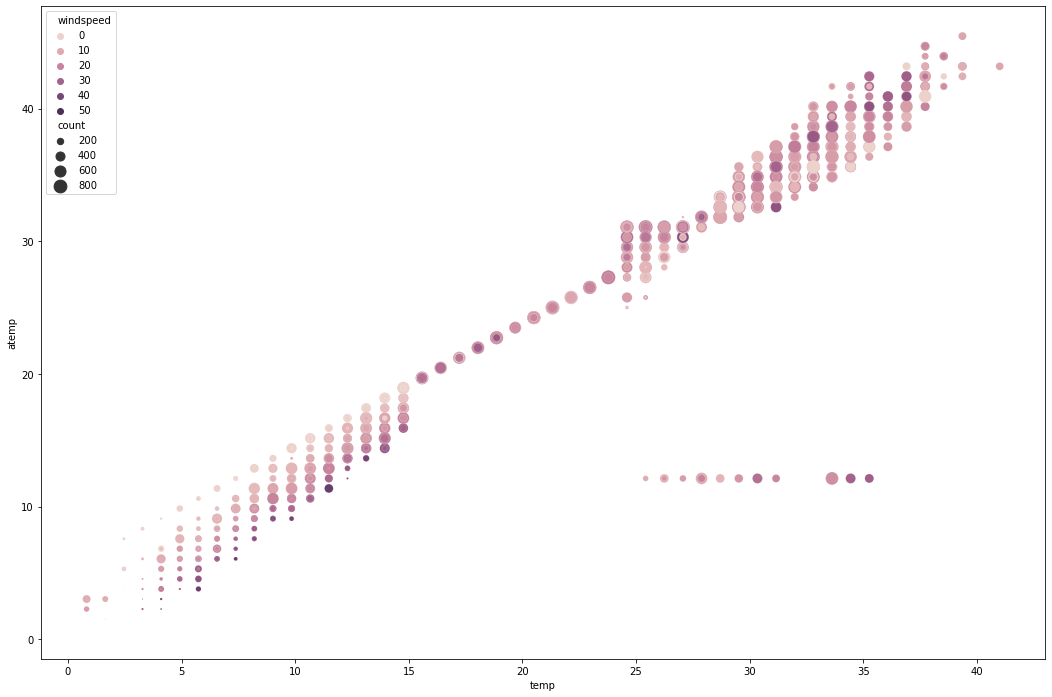

In [241]:
# code를 적으세요.
plt.figure(figsize=(18,12))
sns.scatterplot(data=train, x='temp', y='atemp', hue = 'windspeed', size ='count', sizes=(0, 200))

# plt.figure(figsize=(18,8))
# sns.scatterplot(data=train, x='THI', y='temp', hue = 'season', size='count', sizes=(0,50))

6-2. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제6-2](문제6-2.jpg)

<Figure size 1296x720 with 0 Axes>

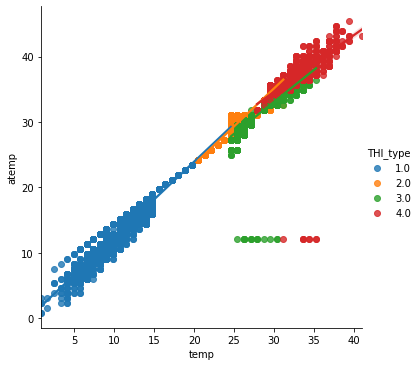

In [246]:
# code를 적으세요.

plt.figure(figsize=(18,10))
sns.lmplot(data=train, x='temp', y='atemp', hue='THI_type', fit_reg=True)

# plt.figure(figsize=(18,8))
# sns.lmplot(data=train, x='THI', y='temp', hue='season', size=10, fit_reg=True)

7. train 데이터를 활용하여 temp 와 atemp을 빼서 temp(diff)을 구하고 astype()을 활용하여 아래와 같은 dataframe을 도출해보세요.
![문제7](문제7.jpg)

In [253]:
# code를 적으세요.
train['temp(diff)'] = (train['temp'] - train['atemp']).astype(int)
train[['temp', 'atemp', 'temp(diff)']]

,temp,atemp,temp(diff)
0,9.84,14.395,-4
1,9.02,13.635,-4
2,9.02,13.635,-4
3,9.84,14.395,-4
4,9.84,14.395,-4
...,...,...,...
10881,15.58,19.695,-4
10882,14.76,17.425,-2
10883,13.94,15.910,-1
10884,13.94,17.425,-3


8. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제8](문제8.jpg)

<AxesSubplot:xlabel='temp(diff)', ylabel='count'>

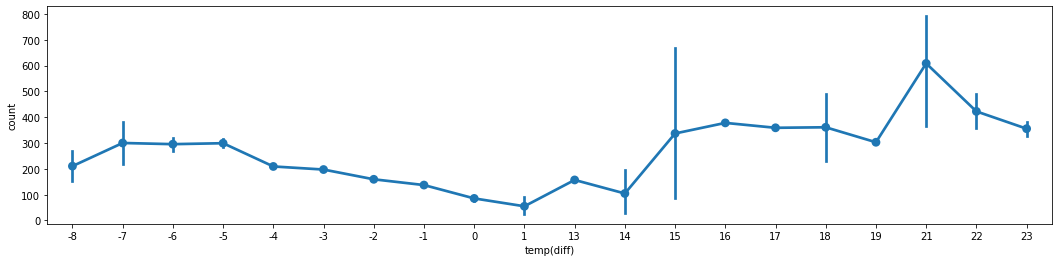

In [256]:
# code를 적으세요.
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='temp(diff)', y='count')

9. 연도 별로 아래 그래프를 도출해보세요. 2011년이 일부분만 나옵니다. temp(diff)가 1을 초과하는 플러스가 되는 경우는 이상치로 봐야 됩니다
![문제9](문제9.jpg)

<AxesSubplot:xlabel='temp(diff)', ylabel='count'>

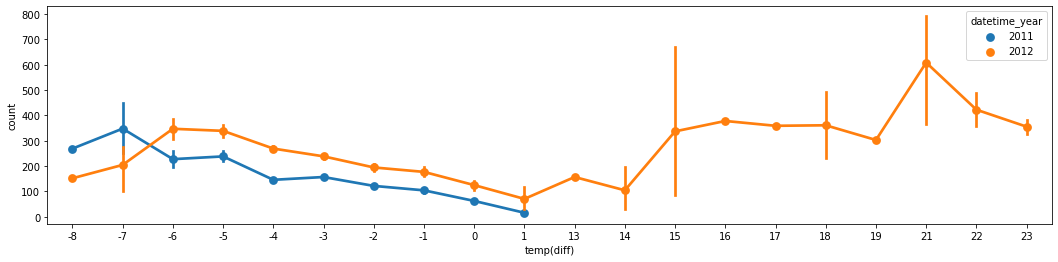

In [257]:
# code를 적으세요.
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='temp(diff)', y='count', hue='datetime_year')

9-2. train의 컬럼을 아래와 같이 도출해보세요.
![문제9-2](문제9-2.jpg)

In [258]:
# code를 적으세요.
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
       'datetime_minute', 'datetime_second', 'datetime_weekday', 'weekday',
       'windspeed_int', 'THI', 'THI_1', 'THI_2', 'THI_3', 'THI_4', 'THI_type',
       'temp(diff)'],
      dtype='object')

9-3. train의 컬럼을 활용해서 새로운 dataframe을 만드는데 아래의 컬럼만 나오도록 만드세요.
![문제9-3](문제9-3.jpg)

In [260]:
# code를 적으세요.
train_simpler = train[[
       'datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
    'weekday','THI', 'THI_type', 'temp(diff)', 'casual', 'registered', 'count']]
train_simpler.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime_year', 'datetime_month',
       'datetime_day', 'datetime_hour', 'weekday', 'THI', 'THI_type',
       'temp(diff)', 'casual', 'registered', 'count'],
      dtype='object')

10. 위 dataframe 데이터를 활용하여 아래와 같은 heatmap을 도출해보세요.
![문제10](문제10.jpg)

<AxesSubplot:>

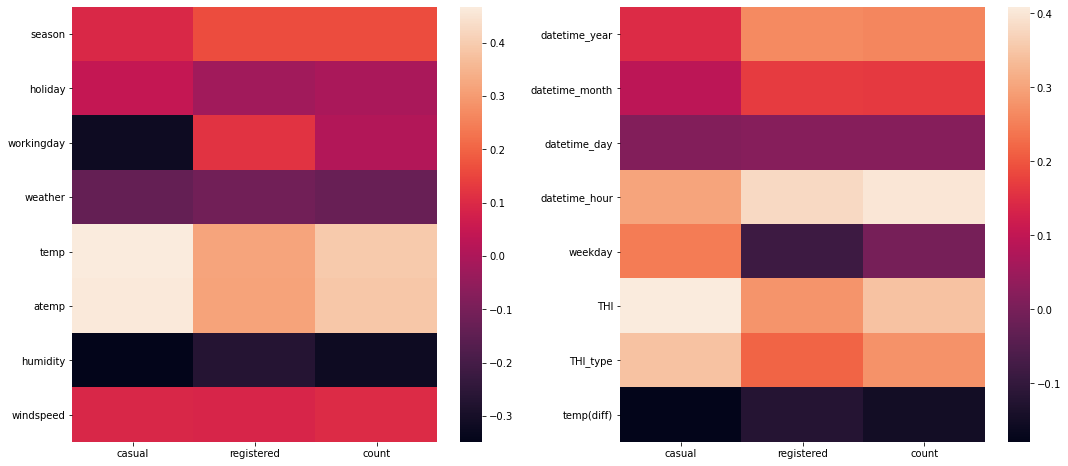

In [263]:
# code를 적으세요.
# train_simpler.corr()
# train_simpler.columns

figure,(ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,8)
sns.heatmap(train_simpler.corr().loc['season':'windspeed', 'casual':'count'], ax=ax1)
sns.heatmap(train_simpler.corr().loc['datetime_year':'temp(diff)', 'casual':'count'], ax=ax2)

# figure,(ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# figure.set_size_inches(18,8)
# sns.heatmap(train_simple.corr().loc['season':'humidity', 'casual':'count'], ax=ax1) # heatmap's more often used
# sns.heatmap(train_simple.corr().loc['datetime_year':'THI_type', 'casual':'count'], ax=ax2)

11. heatmap에서 count와 temp(diff)간 상관성이 적어 보입니다. boxplot으로 아래와 같이 도출해서 왜 그런지 생각해봅시다. 
![문제11](문제11.jpg)

<AxesSubplot:xlabel='temp(diff)', ylabel='count'>

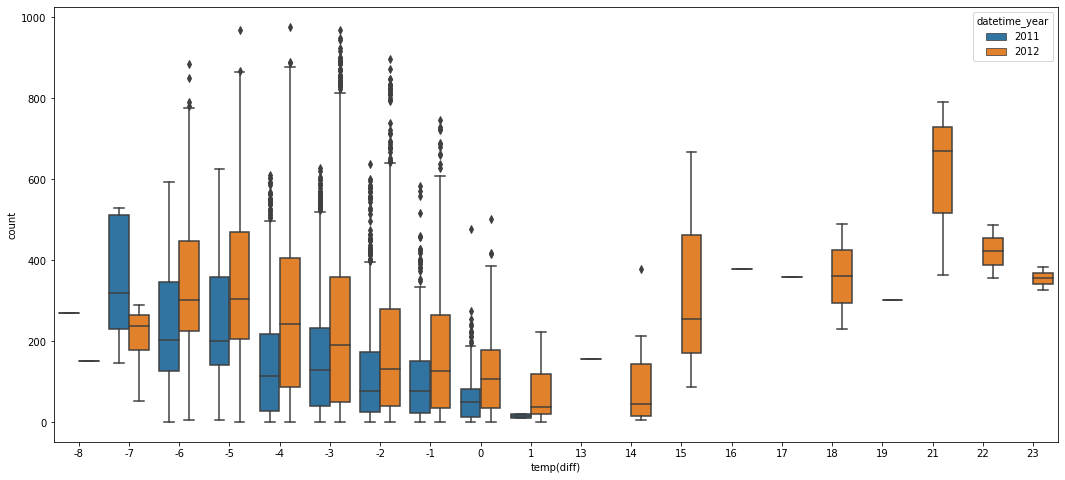

In [264]:
# code를 적으세요.
plt.figure(figsize=(18,8))
sns.boxplot(data=train, x='temp(diff)', y='count', hue='datetime_year')


# plt.figure(figsize=(18,8))
# sns.boxplot(data=train, x='THI_type', y='count', hue='datetime_year')